In [1]:
import numpy as np
import cv2
import datetime
import keras
import tensorflow as tf
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Conv2D, Flatten, MaxPooling2D,Dense, MaxPool2D 
from keras.layers import BatchNormalization
from keras.models  import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import random,os,glob
import matplotlib.pyplot as plt

from keras.applications.vgg16 import VGG16,preprocess_input

In [2]:
dir_path = r"D:\AI_ML_DL\Datasets\freiburg_groceries_dataset\images"

In [3]:
img_size=224

In [4]:
img_list = glob.glob(os.path.join(dir_path, '*/*.png'))

In [5]:
img_list

['D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEANS\\BEANS0000.png',
 'D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEANS\\BEANS0001.png',
 'D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEANS\\BEANS0002.png',
 'D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEANS\\BEANS0003.png',
 'D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEANS\\BEANS0004.png',
 'D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEANS\\BEANS0005.png',
 'D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEANS\\BEANS0006.png',
 'D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEANS\\BEANS0007.png',
 'D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEANS\\BEANS0008.png',
 'D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEANS\\BEANS0009.png',
 'D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEANS\\BEANS0010.png',
 'D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEA

In [6]:
train=ImageDataGenerator(horizontal_flip=True,
                         vertical_flip=True,
                         validation_split=0.1,
                         rescale=1./255,
                         shear_range = 0.1,
                         zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)

test=ImageDataGenerator(rescale=1/255,
                        validation_split=0.1)

train_generator=train.flow_from_directory(dir_path,
                                          target_size=(img_size,img_size),
                                          batch_size=32,
                                          class_mode='categorical',
                                          subset='training')

test_generator=test.flow_from_directory(dir_path,
                                        target_size=(img_size,img_size),
                                        batch_size=32,
                                        class_mode='categorical',
                                        subset='validation')

labels = (train_generator.class_indices)
print(labels)

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 4463 images belonging to 25 classes.
Found 484 images belonging to 25 classes.
{'BEANS': 0, 'CAKE': 1, 'CANDY': 2, 'CEREAL': 3, 'CHIPS': 4, 'CHOCOLATE': 5, 'COFFEE': 6, 'CORN': 7, 'FISH': 8, 'FLOUR': 9, 'HONEY': 10, 'JAM': 11, 'JUICE': 12, 'MILK': 13, 'NUTS': 14, 'OIL': 15, 'PASTA': 16, 'RICE': 17, 'SODA': 18, 'SPICES': 19, 'SUGAR': 20, 'TEA': 21, 'TOMATO_SAUCE': 22, 'VINEGAR': 23, 'WATER': 24}
{0: 'BEANS', 1: 'CAKE', 2: 'CANDY', 3: 'CEREAL', 4: 'CHIPS', 5: 'CHOCOLATE', 6: 'COFFEE', 7: 'CORN', 8: 'FISH', 9: 'FLOUR', 10: 'HONEY', 11: 'JAM', 12: 'JUICE', 13: 'MILK', 14: 'NUTS', 15: 'OIL', 16: 'PASTA', 17: 'RICE', 18: 'SODA', 19: 'SPICES', 20: 'SUGAR', 21: 'TEA', 22: 'TOMATO_SAUCE', 23: 'VINEGAR', 24: 'WATER'}


In [7]:
for image_batch, label_batch in train_generator:
      break
image_batch.shape, label_batch.shape

((32, 224, 224, 3), (32, 25))

In [8]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=25, activation="softmax"))

In [46]:
model=Sequential()
#Convolution blocks
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())


model.add(Dense(25,activation='softmax'))

filepath="retail_trained_model.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

In [12]:
base_model = VGG16(include_top=False,
                  input_shape = (img_size,img_size,3),
                  weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    
for layer in base_model.layers:
    print(layer,layer.trainable)

model = keras.models.Sequential()
model.add(base_model)
model.add( tf.keras.layers.GlobalAveragePooling2D())
model.add( tf.keras.layers.Dropout(0.3))
model.add( tf.keras.layers.Dense(25,activation='softmax'))

# model.summary()

58892288/58889256 [==============================] - 43s 1us/step
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000001C835B98FD0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001C837BC46A0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001C837BC4BE0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001C837BC4CC0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001C837C19A58> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001C837D8B9B0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001C837D8B8D0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001C837D92518> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001C837D9D400> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001C837D9D828> False
<tensorflow.python.keras.layers.pooling.Ma

In [13]:
input_shape=[None,img_size,img_size,3]
model.build(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 25)                12825     
Total params: 14,727,513
Trainable params: 12,825
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
filepath="vgg_retail_trained_model.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['acc']) # RMS PROP - No accuracy

In [14]:
history = model.fit_generator(train_generator,
                              epochs=50,
                              steps_per_epoch=4463//32,
                              validation_data=test_generator,
                              validation_steps=484//32,
                              workers = 4,
                              callbacks=callbacks_list) 

Epoch 1/50
139/139 [==============================] - ETA: 0s - loss: 3.1567 - acc: 0.0745
Epoch 00001: val_acc did not improve from 0.07708
139/139 [==============================] - 77s 557ms/step - loss: 3.1567 - acc: 0.0745 - val_loss: 3.1524 - val_acc: 0.0771
Epoch 2/50
139/139 [==============================] - ETA: 0s - loss: 3.1552 - acc: 0.0752
Epoch 00002: val_acc did not improve from 0.07708
139/139 [==============================] - 78s 560ms/step - loss: 3.1552 - acc: 0.0752 - val_loss: 3.1528 - val_acc: 0.0750
Epoch 3/50
139/139 [==============================] - ETA: 0s - loss: 3.1553 - acc: 0.0756
Epoch 00003: val_acc did not improve from 0.07708
139/139 [==============================] - 77s 557ms/step - loss: 3.1553 - acc: 0.0756 - val_loss: 3.1515 - val_acc: 0.0771
Epoch 4/50
139/139 [==============================] - ETA: 0s - loss: 3.1555 - acc: 0.0749
Epoch 00004: val_acc did not improve from 0.07708
139/139 [==============================] - 78s 559ms/step - loss

KeyboardInterrupt: 

In [17]:
model=keras.models.load_model('retail_saved.h5')

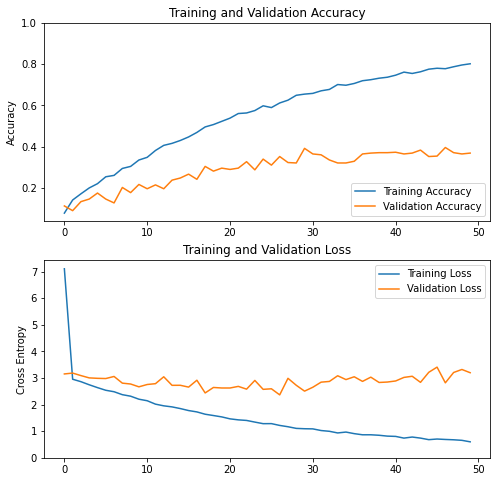

In [43]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

# ________________ Graph 1 -------------------------

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# ________________ Graph 2 -------------------------

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

Maximum Probability:  0.9932203
Classified: plastic


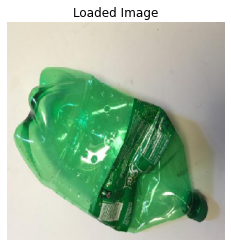

In [28]:
from keras.preprocessing import image

img_path ="D:\AI_ML_DL\Datasets\Garbage classification\Garbage classification\plastic\plastic472.jpg"

img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)

In [20]:
model.save("garbage_saved.h5")

In [25]:
%tensorboard --logdir logs/fit
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
%tensorboard --logdir logs/fit

UsageError: Line magic function `%tensorboard` not found.


In [47]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [48]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 22856), started 0:43:32 ago. (Use '!kill 22856' to kill it.)

In [29]:
history = model.fit_generator(train_generator,
                              epochs=100,
                              steps_per_epoch=2276//32,
                              validation_data=test_generator,
                              validation_steps=251//32,
                              workers = 4,
                              callbacks=callbacks_list) 

Epoch 1/100
71/71 [==============================] - ETA: 0s - loss: 1.6081 - acc: 0.3168
Epoch 00001: val_acc improved from -inf to 0.44196, saving model to trained_model.h5
71/71 [==============================] - 12s 166ms/step - loss: 1.6081 - acc: 0.3168 - val_loss: 1.4552 - val_acc: 0.4420
Epoch 2/100
71/71 [==============================] - ETA: 0s - loss: 1.4178 - acc: 0.4198
Epoch 00002: val_acc improved from 0.44196 to 0.46429, saving model to trained_model.h5
71/71 [==============================] - 13s 179ms/step - loss: 1.4178 - acc: 0.4198 - val_loss: 1.3287 - val_acc: 0.4643
Epoch 3/100
71/71 [==============================] - ETA: 0s - loss: 1.3427 - acc: 0.4407
Epoch 00003: val_acc did not improve from 0.46429
71/71 [==============================] - 13s 188ms/step - loss: 1.3427 - acc: 0.4407 - val_loss: 1.3694 - val_acc: 0.4330
Epoch 4/100
71/71 [==============================] - ETA: 0s - loss: 1.2894 - acc: 0.4768
Epoch 00004: val_acc improved from 0.46429 to 0.477

Epoch 31/100
71/71 [==============================] - ETA: 0s - loss: 0.5327 - acc: 0.8142
Epoch 00031: val_acc did not improve from 0.70536
71/71 [==============================] - 15s 211ms/step - loss: 0.5327 - acc: 0.8142 - val_loss: 1.2052 - val_acc: 0.6250
Epoch 32/100
71/71 [==============================] - ETA: 0s - loss: 0.5507 - acc: 0.8066
Epoch 00032: val_acc improved from 0.70536 to 0.71429, saving model to trained_model.h5
71/71 [==============================] - 15s 215ms/step - loss: 0.5507 - acc: 0.8066 - val_loss: 0.8911 - val_acc: 0.7143
Epoch 33/100
71/71 [==============================] - ETA: 0s - loss: 0.5231 - acc: 0.8124
Epoch 00033: val_acc improved from 0.71429 to 0.72321, saving model to trained_model.h5
71/71 [==============================] - 16s 222ms/step - loss: 0.5231 - acc: 0.8124 - val_loss: 0.9147 - val_acc: 0.7232
Epoch 34/100
71/71 [==============================] - ETA: 0s - loss: 0.5056 - acc: 0.8191
Epoch 00034: val_acc improved from 0.72321 t

Epoch 62/100
71/71 [==============================] - ETA: 0s - loss: 0.3911 - acc: 0.8636
Epoch 00062: val_acc did not improve from 0.78125
71/71 [==============================] - 15s 211ms/step - loss: 0.3911 - acc: 0.8636 - val_loss: 0.9205 - val_acc: 0.7321
Epoch 63/100
71/71 [==============================] - ETA: 0s - loss: 0.3024 - acc: 0.8980
Epoch 00063: val_acc did not improve from 0.78125
71/71 [==============================] - 15s 211ms/step - loss: 0.3024 - acc: 0.8980 - val_loss: 0.9632 - val_acc: 0.7545
Epoch 64/100
71/71 [==============================] - ETA: 0s - loss: 0.2749 - acc: 0.8997
Epoch 00064: val_acc did not improve from 0.78125
71/71 [==============================] - 15s 208ms/step - loss: 0.2749 - acc: 0.8997 - val_loss: 0.9879 - val_acc: 0.7411
Epoch 65/100
71/71 [==============================] - ETA: 0s - loss: 0.3002 - acc: 0.8917
Epoch 00065: val_acc did not improve from 0.78125
71/71 [==============================] - 15s 209ms/step - loss: 0.3002

Epoch 93/100
71/71 [==============================] - ETA: 0s - loss: 0.2031 - acc: 0.9296
Epoch 00093: val_acc did not improve from 0.81250
71/71 [==============================] - 17s 244ms/step - loss: 0.2031 - acc: 0.9296 - val_loss: 0.8951 - val_acc: 0.7812
Epoch 94/100
71/71 [==============================] - ETA: 0s - loss: 0.2193 - acc: 0.9256
Epoch 00094: val_acc did not improve from 0.81250
71/71 [==============================] - 17s 242ms/step - loss: 0.2193 - acc: 0.9256 - val_loss: 1.1189 - val_acc: 0.7679
Epoch 95/100
71/71 [==============================] - ETA: 0s - loss: 0.2264 - acc: 0.9176
Epoch 00095: val_acc did not improve from 0.81250
71/71 [==============================] - 17s 245ms/step - loss: 0.2264 - acc: 0.9176 - val_loss: 1.2168 - val_acc: 0.7500
Epoch 96/100
71/71 [==============================] - ETA: 0s - loss: 0.2828 - acc: 0.9078
Epoch 00096: val_acc did not improve from 0.81250
71/71 [==============================] - 18s 247ms/step - loss: 0.2828

In [31]:
model.save("garbage_vgg.h5")

In [21]:
model1=keras.models.load_model("garbage_vgg.h5")

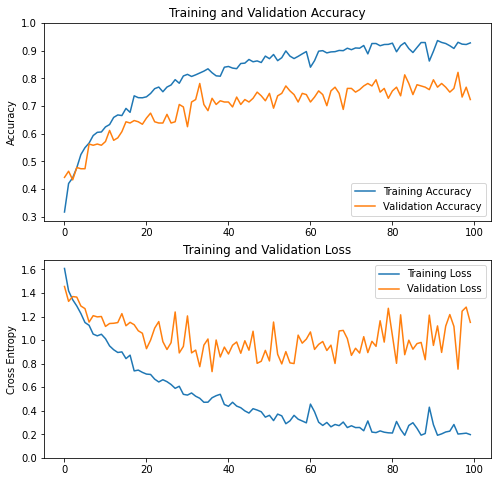

In [32]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

# ________________ Graph 1 -------------------------

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# ________________ Graph 2 -------------------------

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

Maximum Probability:  0.66319954
Classified: glass


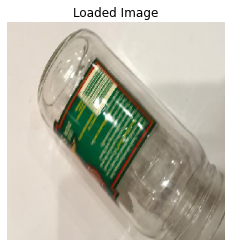

In [27]:
from keras.preprocessing import image

img_path ="D:\AI_ML_DL\Datasets\Garbage classification\Garbage classification\glass\glass23.jpg"

img = image.load_img(img_path, target_size=(300, 300))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model1.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)

In [9]:
from keras.applications import VGG19

In [35]:
y_train.shape[1]

NameError: name 'y_train' is not defined

In [36]:
base_model = VGG19(include_top = False, weights = 'imagenet', input_shape = (112,112,3))

In [37]:
model= Sequential()
model.add(base_model) 
model.add(Flatten()) 

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 3, 3, 512)         20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
Total params: 20,024,384
Trainable params: 20,024,384
Non-trainable params: 0
_________________________________________________________________


In [39]:

#Adding the Dense layers along with activation and batch normalization
model.add(Dense(1024,activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu'))) 
model.add(Dense(256,activation=('relu'))) 
model.add(Dropout(.3))
model.add(Dense(128,activation=('relu')))
#model.add(Dropout(.2))
model.add(Dense(6,activation=('softmax'))) 

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 3, 3, 512)         20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 1024)              4719616   
_________________________________________________________________
dense_16 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)              

In [41]:

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
filepath="trained_model.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

In [42]:
history = model.fit_generator(train_generator,
                              epochs=100,
                              steps_per_epoch=2276//32,
                              validation_data=test_generator,
                              validation_steps=251//32,
                              
                              callbacks=callbacks_list) 

Epoch 1/100
71/71 [==============================] - ETA: 0s - loss: 1.9864 - acc: 0.2090- - ETA: 1s - loss: 2.0141 - acc:
Epoch 00001: val_acc improved from -inf to 0.23661, saving model to trained_model.h5
71/71 [==============================] - 15s 214ms/step - loss: 1.9864 - acc: 0.2090 - val_loss: 1.7281 - val_acc: 0.2366
Epoch 2/100
71/71 [==============================] - ETA: 0s - loss: 1.7356 - acc: 0.2126 - ETA: 8s - loss: 1.7373 - acc: 0.2 - ETA: 8s -  - ETA: 3s - loss: 1.7289 - acc - ETA: 1s - loss: 1.7328 - ac
Epoch 00002: val_acc improved from 0.23661 to 0.24107, saving model to trained_model.h5
71/71 [==============================] - 15s 204ms/step - loss: 1.7356 - acc: 0.2126 - val_loss: 1.7341 - val_acc: 0.2411
Epoch 3/100
71/71 [==============================] - ETA: 0s - loss: 1.7384 - acc: 0.2286- ETA: 5s -
Epoch 00003: val_acc did not improve from 0.24107
71/71 [==============================] - 14s 198ms/step - loss: 1.7384 - acc: 0.2286 - val_loss: 1.7320 - val

KeyboardInterrupt: 